In [2]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('EZ_500_recoverd_param_lerch_voss_mean_median.csv')

In [4]:
df.insert(3, "v_total = v2 - v1", df['v1_mean']-df['v2_mean'], True)


In [5]:
df.insert(4, "v_bias = v2 + v1", df['v1_mean']+df['v2_mean'], True)


In [6]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [7]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
0,3024_class_words_part_1.dat,2.618686,-1.782665,4.401351,0.836020,1.240104,0.482941,1.831886,2.616068,-1.780664,1.238501,0.483537,1.837653
1,1025_class_words_part_2.dat,3.971762,-3.301207,7.272969,0.670555,0.986329,0.444981,1.864223,3.980259,-3.298341,0.982895,0.445491,1.866721
2,1011_class_pictures_part_1.dat,0.804880,-1.662099,2.466980,-0.857219,0.795498,0.607122,1.431124,0.796424,-1.653777,0.792364,0.607514,1.425350
3,017_class_pictures_part_1.dat,2.434124,-3.693056,6.127180,-1.258932,1.545200,0.548999,1.769264,2.428750,-3.683310,1.522247,0.552525,1.773668
4,1004_class_pictures_part_1.dat,1.621121,-1.817173,3.438294,-0.196053,1.338228,0.586937,1.924027,1.622200,-1.817812,1.338929,0.587878,1.938917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,1.992791,-2.284823,4.277614,-0.292032,1.385653,0.610757,1.926841,1.987733,-2.286048,1.382493,0.611742,1.933964
410,1023_class_pictures_part_1.dat,3.571176,-3.871048,7.442224,-0.299872,1.794586,0.554921,1.769139,3.574770,-3.875438,1.743057,0.559520,1.777616
411,4012_class_pictures_part_1.dat,1.789776,-2.067746,3.857523,-0.277970,1.262450,0.494430,1.875080,1.784172,-2.067688,1.261329,0.495336,1.883895
412,4012_class_pictures_part_2.dat,2.095854,-2.557569,4.653423,-0.461715,1.035231,0.460050,1.625458,2.100749,-2.542449,1.037780,0.461120,1.627029


In [8]:
#consider one session two task
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_1.')]
pictures_part_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
pictures_part_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
2,1011_class_pictures_part_1.dat,0.804880,-1.662099,2.466980,-0.857219,0.795498,0.607122,1.431124,0.796424,-1.653777,0.792364,0.607514,1.425350
3,017_class_pictures_part_1.dat,2.434124,-3.693056,6.127180,-1.258932,1.545200,0.548999,1.769264,2.428750,-3.683310,1.522247,0.552525,1.773668
4,1004_class_pictures_part_1.dat,1.621121,-1.817173,3.438294,-0.196053,1.338228,0.586937,1.924027,1.622200,-1.817812,1.338929,0.587878,1.938917
10,4001_class_pictures_part_1.dat,1.607233,-2.611131,4.218363,-1.003898,1.287189,0.531642,1.967933,1.608001,-2.615207,1.284346,0.532452,1.979068
26,008_class_pictures_part_1.dat,1.809653,-2.841305,4.650958,-1.031652,1.632279,0.521087,1.948427,1.810361,-2.832461,1.622411,0.521853,1.959968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,002_class_pictures_part_1.dat,1.479110,-1.340450,2.819560,0.138660,0.890215,0.551799,1.503852,1.491369,-1.332279,0.889499,0.552313,1.506527
401,005_class_pictures_part_1.dat,1.302735,-2.414188,3.716923,-1.111453,1.610872,0.534952,1.917117,1.302667,-2.407999,1.604417,0.536031,1.925779
409,2005_class_pictures_part_1.dat,1.992791,-2.284823,4.277614,-0.292032,1.385653,0.610757,1.926841,1.987733,-2.286048,1.382493,0.611742,1.933964
410,1023_class_pictures_part_1.dat,3.571176,-3.871048,7.442224,-0.299872,1.794586,0.554921,1.769139,3.574770,-3.875438,1.743057,0.559520,1.777616


In [9]:
df_word_part_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
0,3024_class_words_part_1.dat,2.618686,-1.782665,4.401351,0.836020,1.240104,0.482941,1.831886,2.616068,-1.780664,1.238501,0.483537,1.837653
12,2005_class_words_part_1.dat,2.270733,-2.009016,4.279749,0.261718,1.318478,0.467131,1.704946,2.267267,-2.012379,1.317562,0.467733,1.706723
14,1027_class_words_part_1.dat,3.604487,-4.843586,8.448073,-1.239099,1.585899,0.339188,1.590906,3.613349,-4.868563,1.582464,0.340488,1.594053
15,1006_class_words_part_1.dat,2.302900,-1.688536,3.991436,0.614363,0.871006,0.463475,1.451145,2.295341,-1.685551,0.871230,0.463791,1.451775
20,4004_class_words_part_1.dat,2.416247,-2.735938,5.152185,-0.319691,1.121299,0.390579,1.846043,2.406340,-2.736109,1.123440,0.391145,1.852143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1020_class_words_part_1.dat,2.529871,-2.592212,5.122083,-0.062340,1.444487,0.446500,1.833750,2.517705,-2.587508,1.439265,0.447804,1.834752
397,1002_class_words_part_1.dat,2.006684,-2.962018,4.968702,-0.955334,1.988191,0.378896,1.850902,2.004139,-2.957048,1.977133,0.380218,1.853093
404,1008_class_words_part_1.dat,2.359902,-1.712588,4.072490,0.647314,1.659695,0.507408,1.924242,2.356122,-1.712410,1.658425,0.508437,1.927307
406,015_class_words_part_1.dat,2.760557,-2.485495,5.246052,0.275062,1.426742,0.406096,1.633513,2.763051,-2.487327,1.426928,0.406837,1.634365


In [10]:
import re

# Given String
s = "001_class_pictures_part_1.dat"

# Performing Split
res_1 = re.split('_', s)
res_2 = re.split('a', s, 1)

# Print Results
print(res_1)
print(res_2)

['001', 'class', 'pictures', 'part', '1.dat']
['001_cl', 'ss_pictures_part_1.dat']


In [11]:
import re
#pictures_part_1['subje_num']= 'NaN'
pictures_part_1.insert(0, "subje_num", 'NaN', True)

for ind in pictures_part_1.index :
    name =pictures_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    pictures_part_1['subje_num'][ind]= subj_num
    


/tmp/ipykernel_235201/220719469.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num


In [12]:
pictures_part_1

,subje_num,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
2,1011,1011_class_pictures_part_1.dat,0.804880,-1.662099,2.466980,-0.857219,0.795498,0.607122,1.431124,0.796424,-1.653777,0.792364,0.607514,1.425350
3,017,017_class_pictures_part_1.dat,2.434124,-3.693056,6.127180,-1.258932,1.545200,0.548999,1.769264,2.428750,-3.683310,1.522247,0.552525,1.773668
4,1004,1004_class_pictures_part_1.dat,1.621121,-1.817173,3.438294,-0.196053,1.338228,0.586937,1.924027,1.622200,-1.817812,1.338929,0.587878,1.938917
10,4001,4001_class_pictures_part_1.dat,1.607233,-2.611131,4.218363,-1.003898,1.287189,0.531642,1.967933,1.608001,-2.615207,1.284346,0.532452,1.979068
26,008,008_class_pictures_part_1.dat,1.809653,-2.841305,4.650958,-1.031652,1.632279,0.521087,1.948427,1.810361,-2.832461,1.622411,0.521853,1.959968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,002,002_class_pictures_part_1.dat,1.479110,-1.340450,2.819560,0.138660,0.890215,0.551799,1.503852,1.491369,-1.332279,0.889499,0.552313,1.506527
401,005,005_class_pictures_part_1.dat,1.302735,-2.414188,3.716923,-1.111453,1.610872,0.534952,1.917117,1.302667,-2.407999,1.604417,0.536031,1.925779
409,2005,2005_class_pictures_part_1.dat,1.992791,-2.284823,4.277614,-0.292032,1.385653,0.610757,1.926841,1.987733,-2.286048,1.382493,0.611742,1.933964
410,1023,1023_class_pictures_part_1.dat,3.571176,-3.871048,7.442224,-0.299872,1.794586,0.554921,1.769139,3.574770,-3.875438,1.743057,0.559520,1.777616


In [13]:
#pictures_part_1=pictures_part_1.sort_values('Experiment')
#pictures_part_1

In [14]:
#df_word_part_1=df_word_part_1.sort_values('Experiment')
#df_word_part_1

In [15]:
import re
#pictures_part_1['subje_num']= 'NaN'
df_word_part_1.insert(0, "subje_num", 'NaN', True)

for ind in df_word_part_1.index :
    name =df_word_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    df_word_part_1['subje_num'][ind]= subj_num

/tmp/ipykernel_235201/1242545297.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_part_1['subje_num'][ind]= subj_num


In [16]:
df_word_part_1

,subje_num,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
0,3024,3024_class_words_part_1.dat,2.618686,-1.782665,4.401351,0.836020,1.240104,0.482941,1.831886,2.616068,-1.780664,1.238501,0.483537,1.837653
12,2005,2005_class_words_part_1.dat,2.270733,-2.009016,4.279749,0.261718,1.318478,0.467131,1.704946,2.267267,-2.012379,1.317562,0.467733,1.706723
14,1027,1027_class_words_part_1.dat,3.604487,-4.843586,8.448073,-1.239099,1.585899,0.339188,1.590906,3.613349,-4.868563,1.582464,0.340488,1.594053
15,1006,1006_class_words_part_1.dat,2.302900,-1.688536,3.991436,0.614363,0.871006,0.463475,1.451145,2.295341,-1.685551,0.871230,0.463791,1.451775
20,4004,4004_class_words_part_1.dat,2.416247,-2.735938,5.152185,-0.319691,1.121299,0.390579,1.846043,2.406340,-2.736109,1.123440,0.391145,1.852143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1020,1020_class_words_part_1.dat,2.529871,-2.592212,5.122083,-0.062340,1.444487,0.446500,1.833750,2.517705,-2.587508,1.439265,0.447804,1.834752
397,1002,1002_class_words_part_1.dat,2.006684,-2.962018,4.968702,-0.955334,1.988191,0.378896,1.850902,2.004139,-2.957048,1.977133,0.380218,1.853093
404,1008,1008_class_words_part_1.dat,2.359902,-1.712588,4.072490,0.647314,1.659695,0.507408,1.924242,2.356122,-1.712410,1.658425,0.508437,1.927307
406,015,015_class_words_part_1.dat,2.760557,-2.485495,5.246052,0.275062,1.426742,0.406096,1.633513,2.763051,-2.487327,1.426928,0.406837,1.634365


In [17]:
pictures_part_1=pictures_part_1.sort_values('subje_num')
pictures_part_1['subje_num']

171     001
400     002
355     003
86      004
401     005
       ... 
266    4009
269    4010
83     4011
411    4012
246    4013
Name: subje_num, Length: 103, dtype: object

In [18]:
df_word_part_1=df_word_part_1.sort_values('subje_num')

In [19]:
df_word_part_1

,subje_num,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
368,001,001_class_words_part_1.dat,1.731998,-1.578191,3.310189,0.153808,1.168547,0.370544,1.377299,1.727855,-1.571803,1.166218,0.370964,1.373013
108,002,002_class_words_part_1.dat,2.147956,-1.512012,3.659968,0.635944,1.170940,0.522932,1.909678,2.142278,-1.506822,1.170150,0.523374,1.917373
347,003,003_class_words_part_1.dat,3.006220,-2.594640,5.600860,0.411580,1.276240,0.447040,1.927035,3.003581,-2.591940,1.269327,0.448010,1.932795
97,004,004_class_words_part_1.dat,2.446054,-2.287734,4.733787,0.158320,1.124369,0.393163,1.470508,2.436625,-2.281256,1.121208,0.393844,1.468810
62,005,005_class_words_part_1.dat,3.867753,-3.043166,6.910919,0.824587,1.517524,0.411129,1.888174,3.863424,-3.037934,1.501177,0.412909,1.894516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4009,4009_class_words_part_1.dat,1.807613,-2.088108,3.895720,-0.280495,2.271883,0.340972,1.888604,1.807248,-2.086709,2.258469,0.342878,1.891963
242,4010,4010_class_words_part_1.dat,3.135151,-3.269068,6.404219,-0.133917,1.925132,0.281127,1.429236,3.133474,-3.277347,1.921964,0.282241,1.435715
176,4011,4011_class_words_part_1.dat,1.894378,-1.522964,3.417342,0.371415,0.935863,0.353379,1.353603,1.897983,-1.523356,0.935238,0.353608,1.356190
341,4012,4012_class_words_part_1.dat,2.444861,-2.053456,4.498317,0.391405,1.137041,0.386464,1.658327,2.441083,-2.041882,1.137270,0.387099,1.658046


In [20]:
#corr_frame = pd.DataFrame()
#data = {'Experiment':df_word_part_1['Experiment'],'v1_mean_part_1':np.array(df_word_part_1['v1_mean']),'v1_mean_part_2':np.array(pictures_part_1['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
#corr_data = pd.DataFrame(data)

In [21]:
#Make length of the data same
df_word_part_1=df_word_part_1[df_word_part_1['subje_num'].isin(pictures_part_1['subje_num'])]

In [22]:
data = {'subje_num':df_word_part_1['subje_num'],'v1_mean_word':np.array(df_word_part_1['v1_mean']),'v1_mean_picture':np.array(pictures_part_1['v1_mean'])}


In [23]:
corr_data = pd.DataFrame(data)
corr_data

,subje_num,v1_mean_word,v1_mean_picture
368,001,1.731998,2.142583
108,002,2.147956,1.479110
347,003,3.006220,1.330194
97,004,2.446054,2.045440
62,005,3.867753,1.302735
...,...,...,...
393,4009,1.807613,2.013897
242,4010,3.135151,2.476351
176,4011,1.894378,1.079701
341,4012,2.444861,1.789776


In [24]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [25]:
df_x = corr_data[['v1_mean_word', 'v1_mean_picture']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_word', 'v1_mean_picture']])
df_x

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,v1_mean_word,v1_mean_picture,mahala
368,1.731998,2.142583,3.417535
108,2.147956,1.479110,0.834025
347,3.006220,1.330194,1.415440
97,2.446054,2.045440,0.310410
62,3.867753,1.302735,7.952591
...,...,...,...
393,1.807613,2.013897,2.624174
242,3.135151,2.476351,2.600269
176,1.894378,1.079701,2.807897
341,2.444861,1.789776,0.059634


In [26]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [27]:
df_without_outlier

,v1_mean_word,v1_mean_picture,mahala,p_value


In [28]:
x = df_x['v1_mean_word']
y = df_x['v1_mean_picture']

corr = np.corrcoef(x, y)
corr

array([[1.        , 0.08076805],
       [0.08076805, 1.        ]])

v1_mean_word v1_mean 0.08076804672471964


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


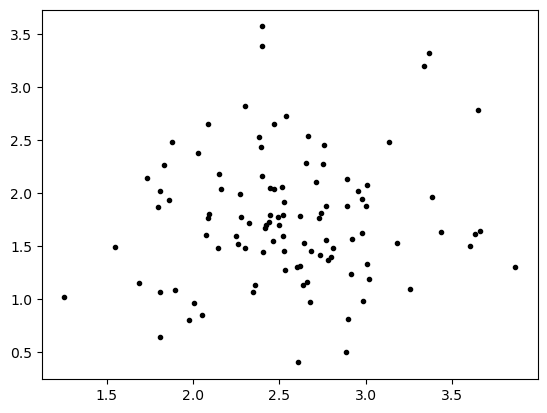

v1_mean_word v2_mean -0.11654090677229975


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


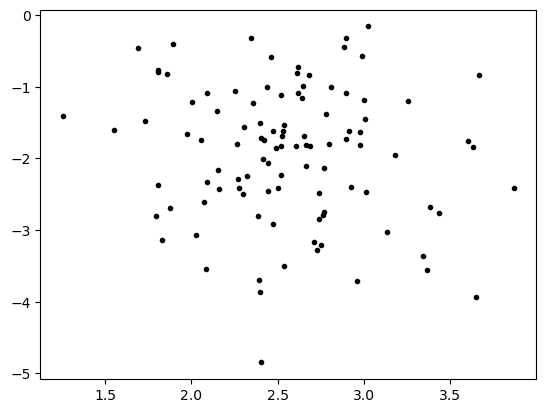

v1_mean_word v_total = v2 - v1 0.10978419825955


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


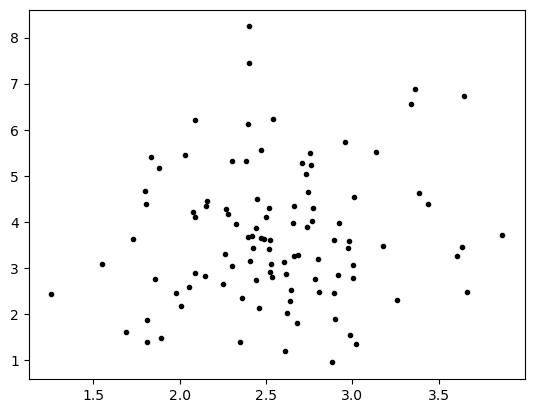

v1_mean_word v_bias = v2 + v1 -0.09428105093757791


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


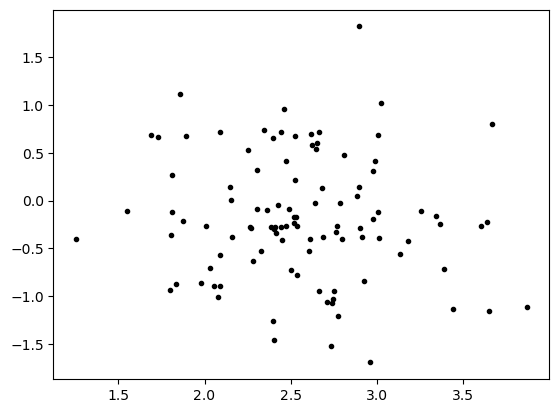

v1_mean_word a_mean 0.09934013482694362


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


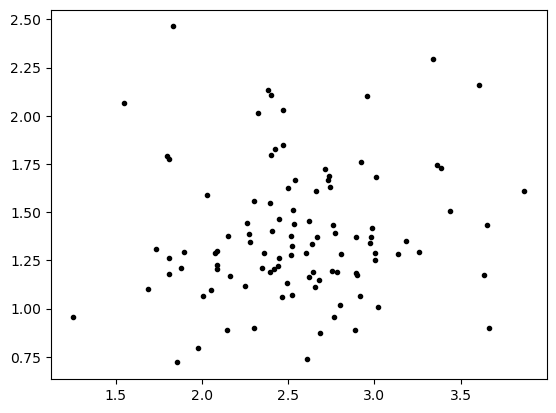

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean_word ndt_mean 0.10334247372253408


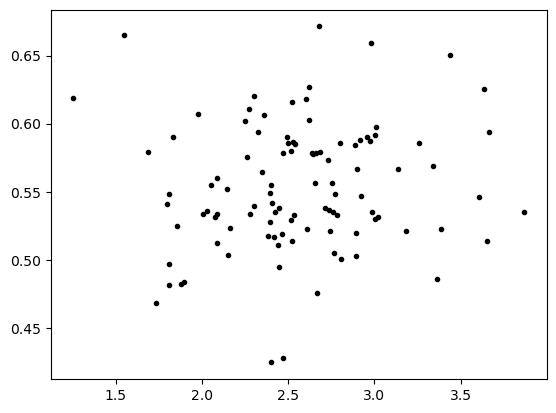

v1_mean_word alpha_mean 0.20665112692589896


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


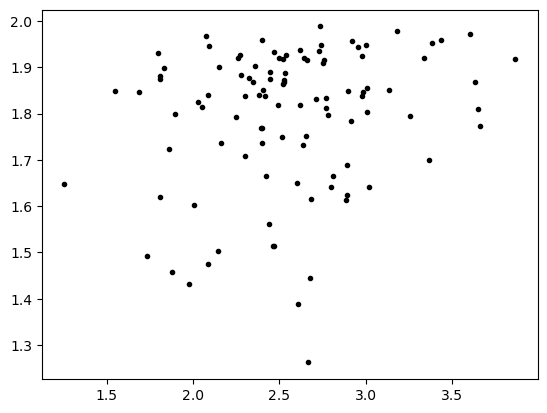

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v1_mean -0.14880027160075943


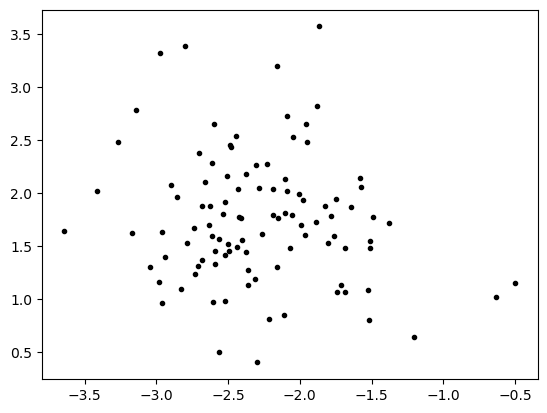

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v2_mean 0.2839074787256378


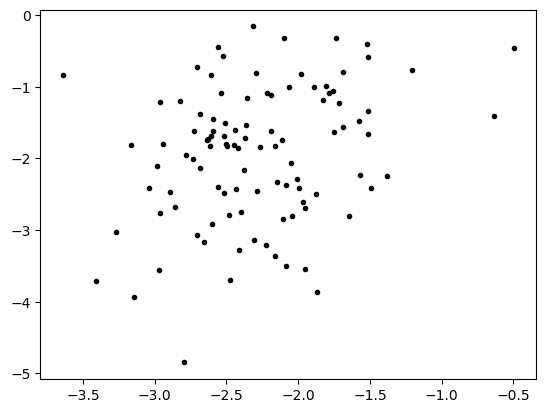

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v_total = v2 - v1 -0.247407339170238


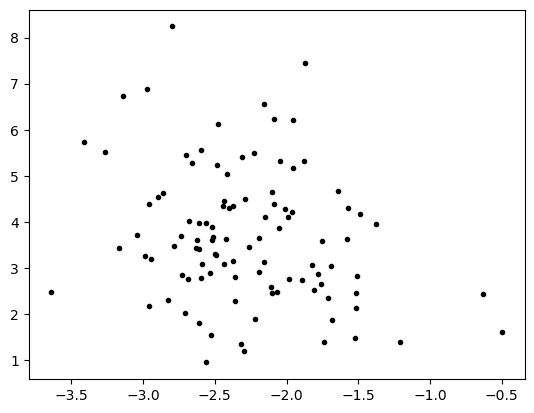

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word v_bias = v2 + v1 0.2745483887535282


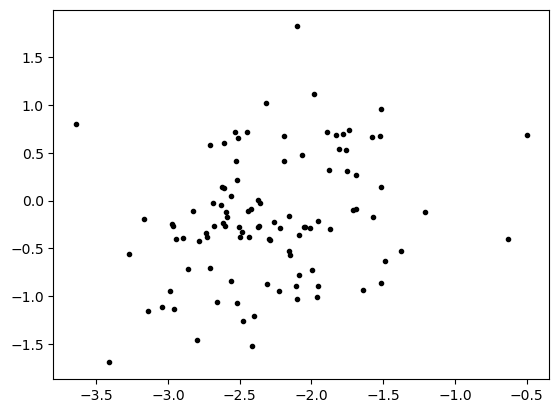

v2_mean_word a_mean -0.18718719230889258


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


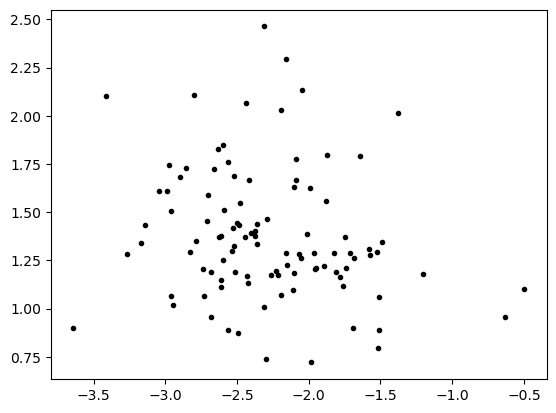

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word ndt_mean 0.027398996301739934


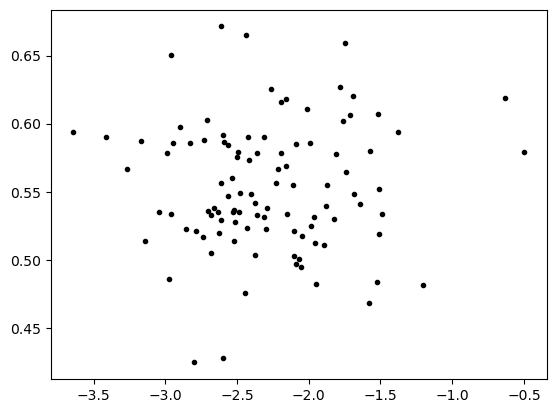

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean_word alpha_mean -0.16436639363039957


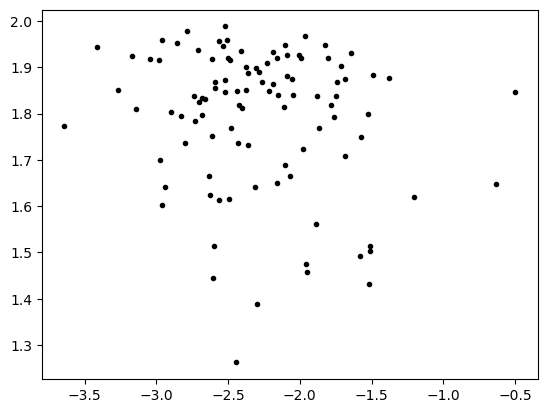

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word v1_mean 0.1348576197422799


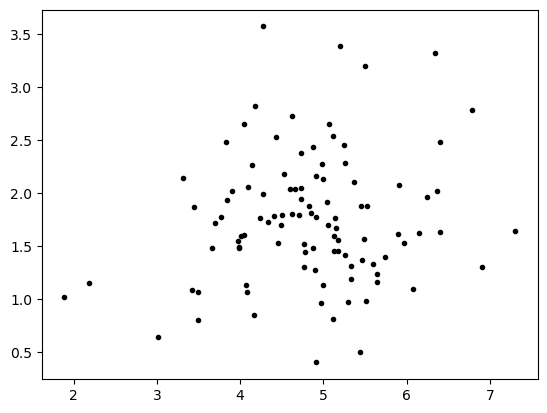

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word v2_mean -0.23026967311693122


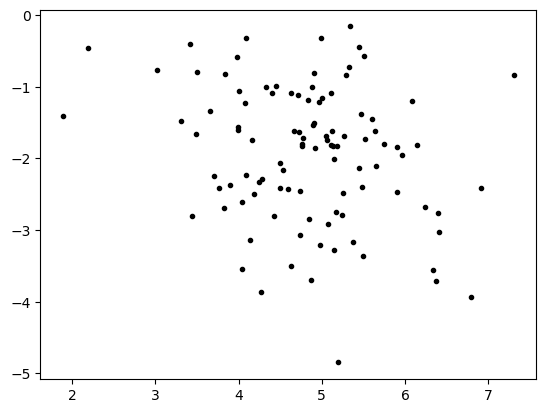

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word v_total = v2 - v1 0.20659012641809366


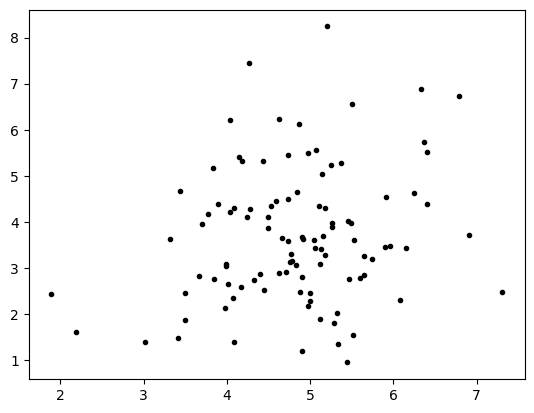

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word v_bias = v2 + v1 -0.19929733938368074


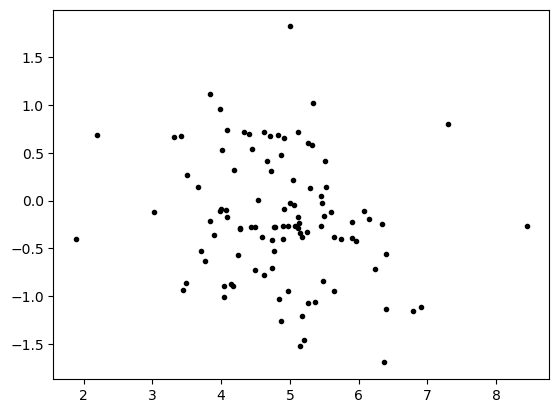

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word a_mean 0.137981111815695


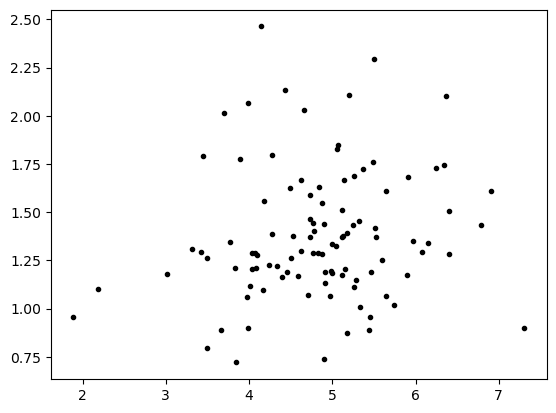

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word ndt_mean 0.03318196425688398


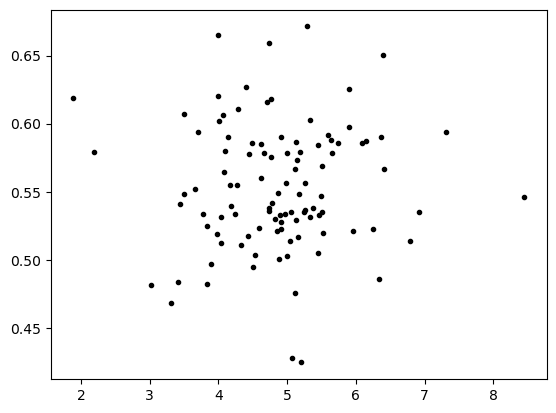

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1_word alpha_mean 0.22200847337607302


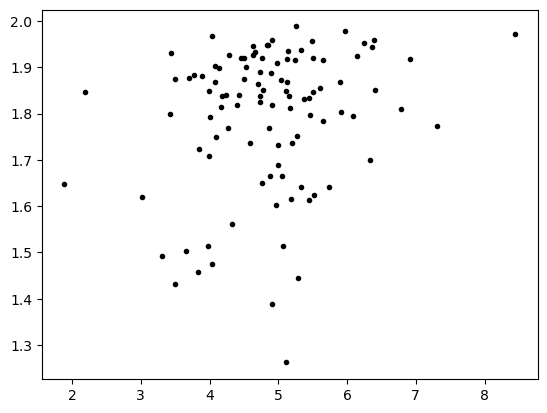

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word v1_mean -0.06283919118694187


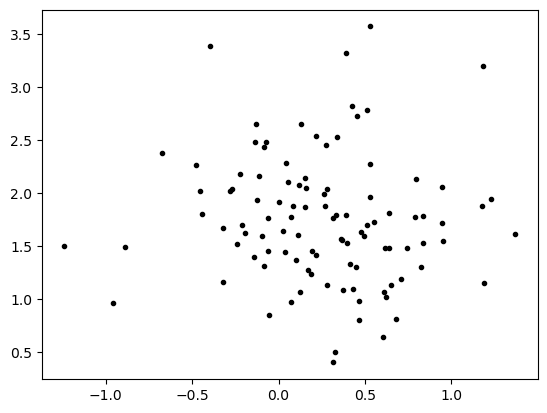

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word v2_mean 0.1921093214833441


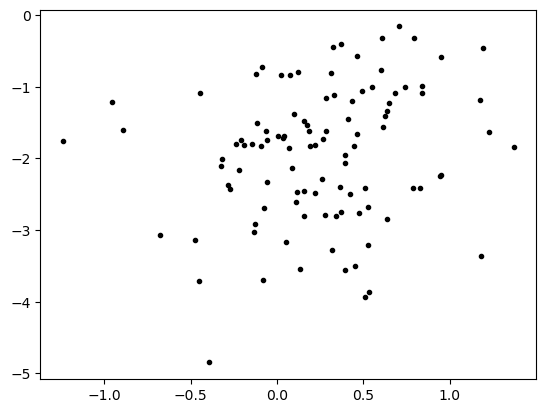

v_bias = v2 + v1_word v_total = v2 - v1 -0.15156457046015098


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


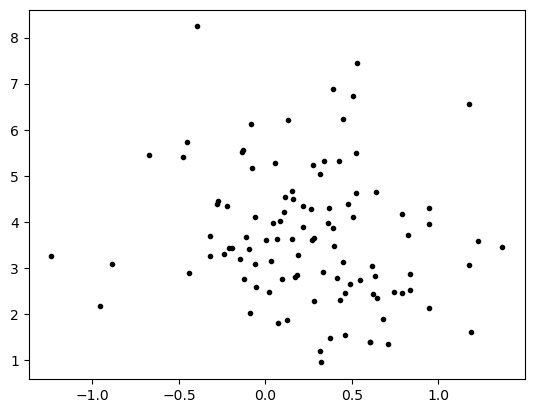

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word v_bias = v2 + v1 0.2210928670832517


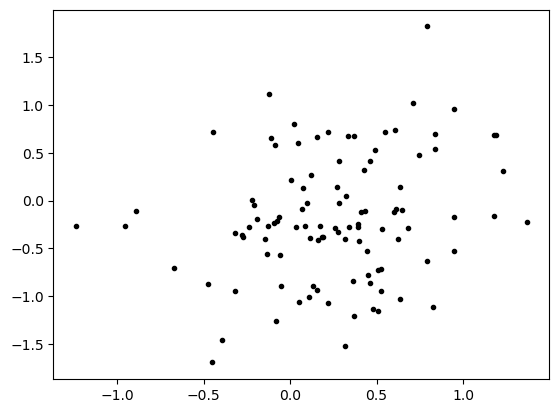

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word a_mean -0.2919366285771299


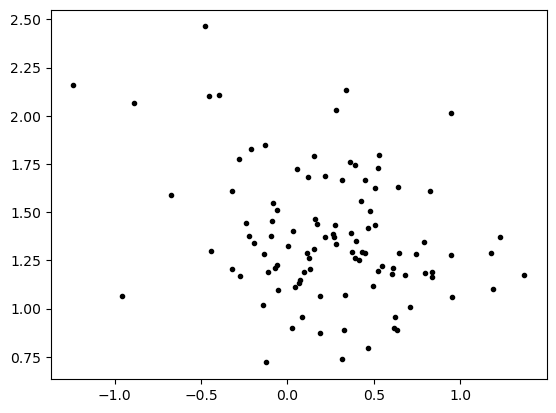

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1_word ndt_mean 0.14871209361585014


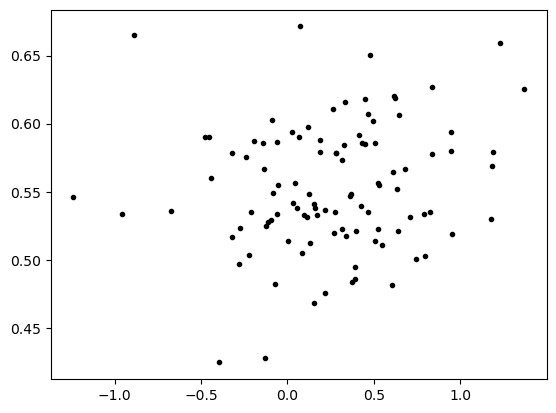

v_bias = v2 + v1_word alpha_mean -0.03117053486726186


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


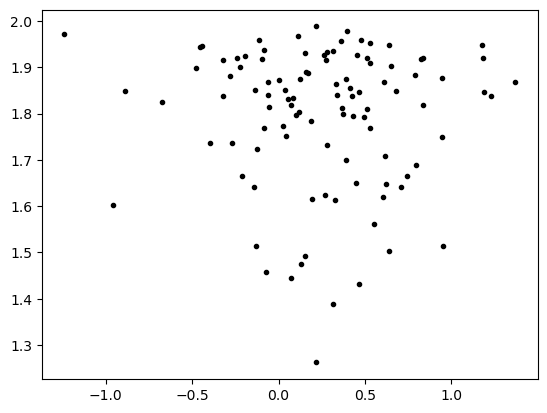

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v1_mean -0.16204009366503505


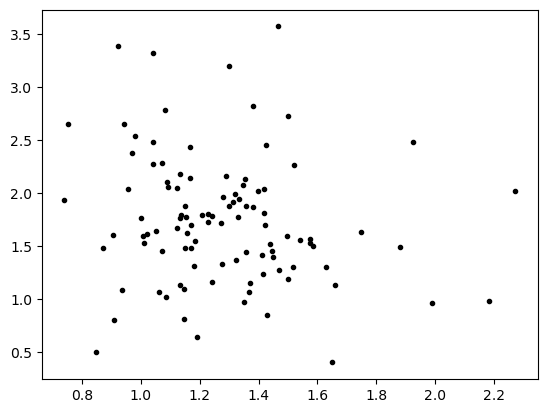

a_mean_word v2_mean 0.021278760058517948


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


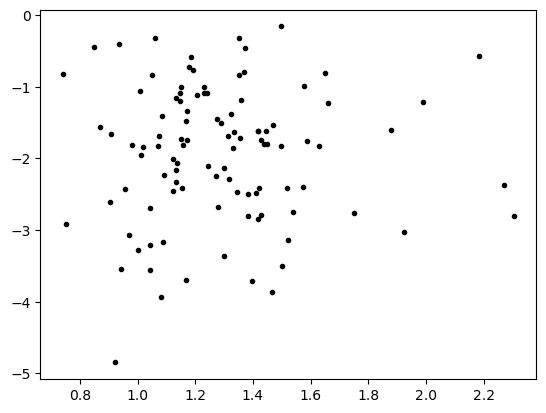

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v_total = v2 - v1 -0.10451869614685033


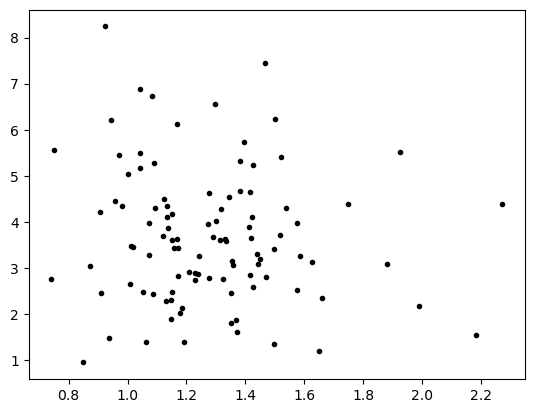

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word v_bias = v2 + v1 -0.06871552720233692


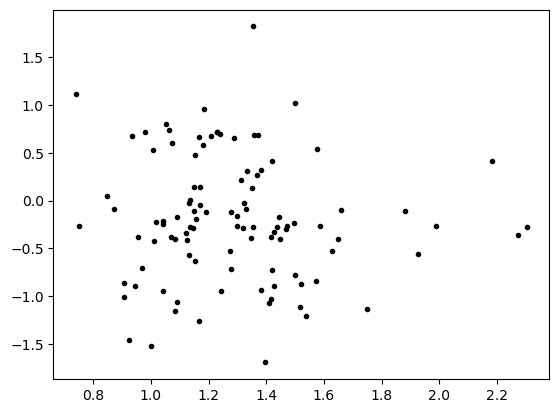

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word a_mean 0.3012202228667862


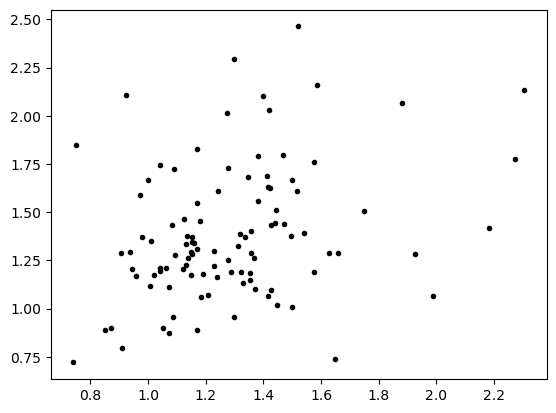

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word ndt_mean 0.2692638138254601


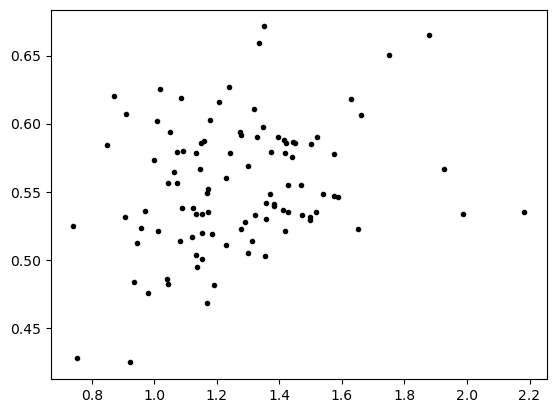

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean_word alpha_mean 0.25828221603925317


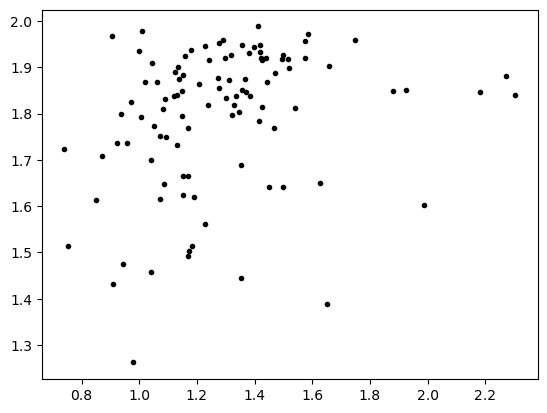

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v1_mean 0.11419324497846632


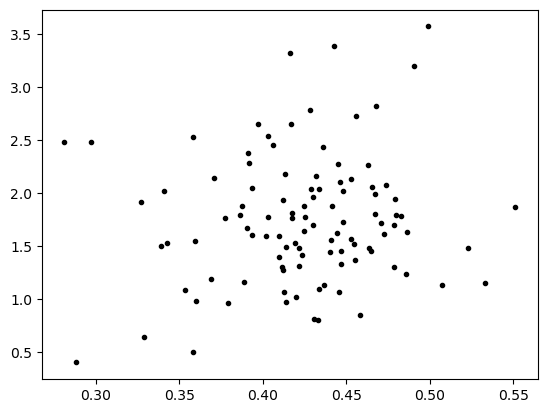

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v2_mean -0.12423051194718014


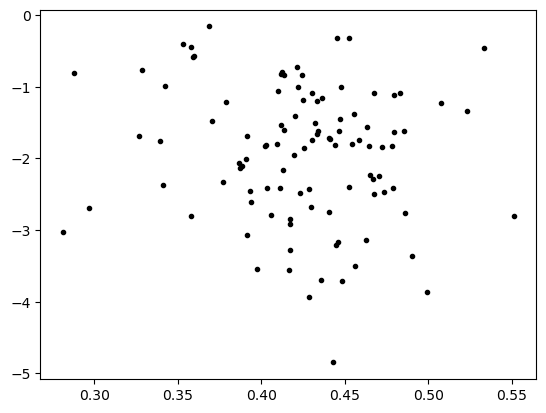

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word v_total = v2 - v1 0.12878045618118245


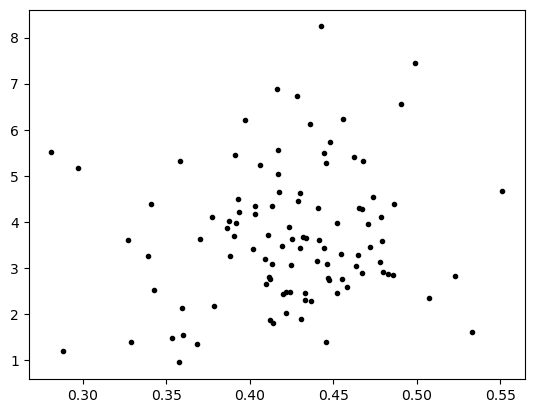

ndt_mean_word v_bias = v2 + v1 -0.07425386256217698


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


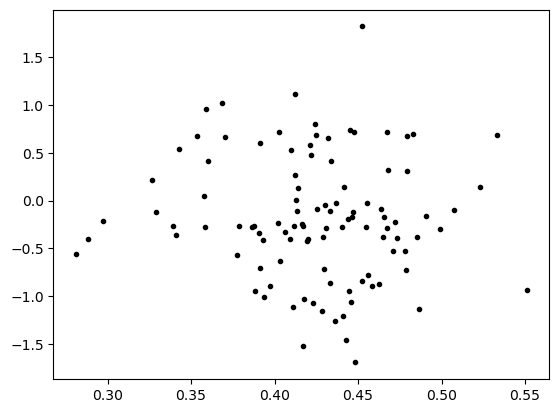

ndt_mean_word a_mean 0.13381871775216536


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


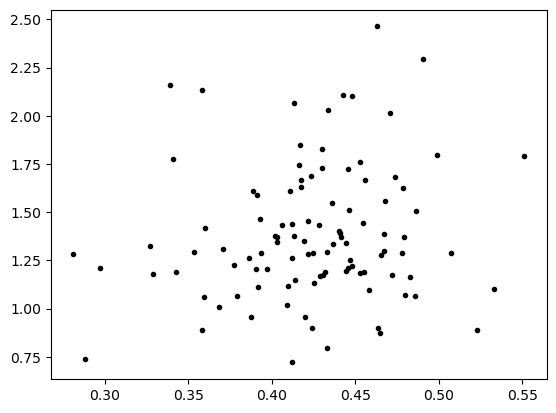

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word ndt_mean 0.4246134325449333


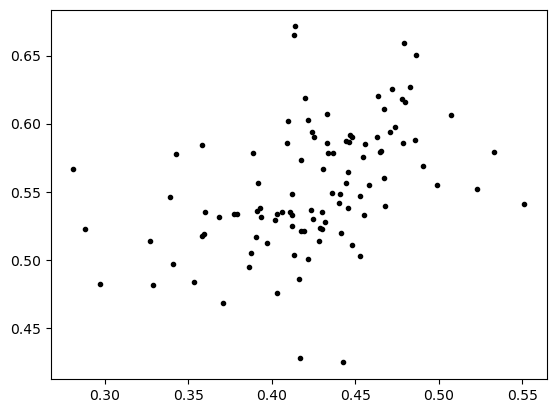

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ndt_mean_word alpha_mean 0.22427540671866053


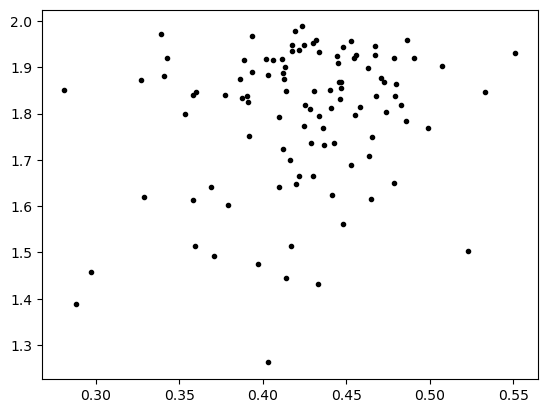

alpha_mean_word v1_mean 0.09100603937783029


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


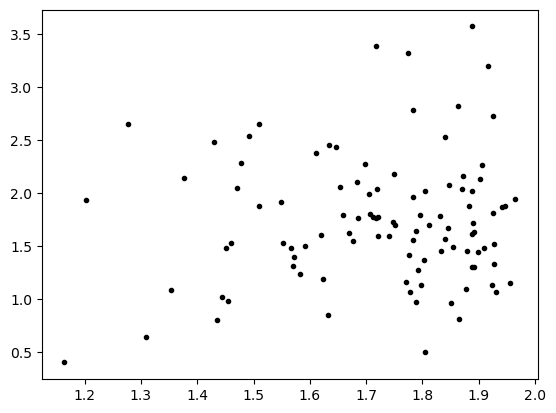

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v2_mean -0.07948893250805948


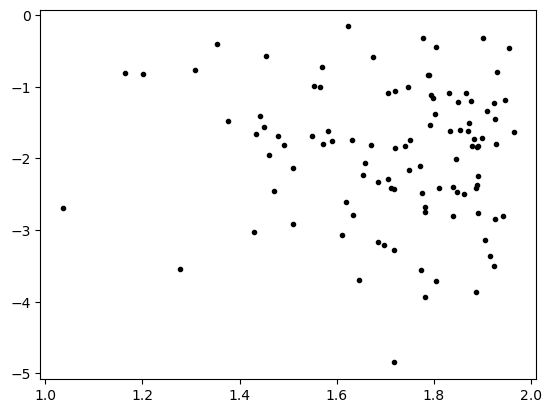

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v_total = v2 - v1 0.11305382938009237


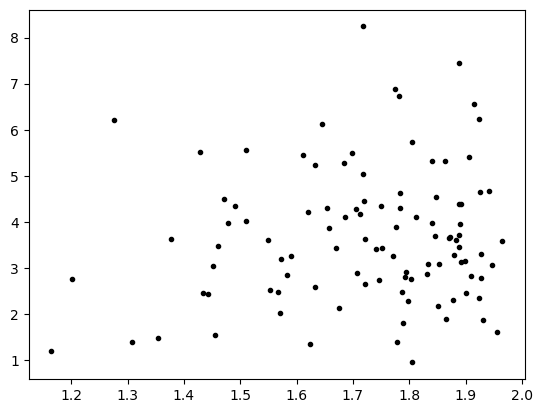

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word v_bias = v2 + v1 -0.07596519496140353


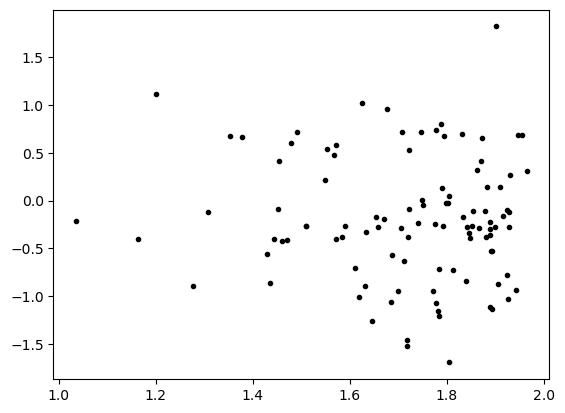

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word a_mean 0.34523193666883994


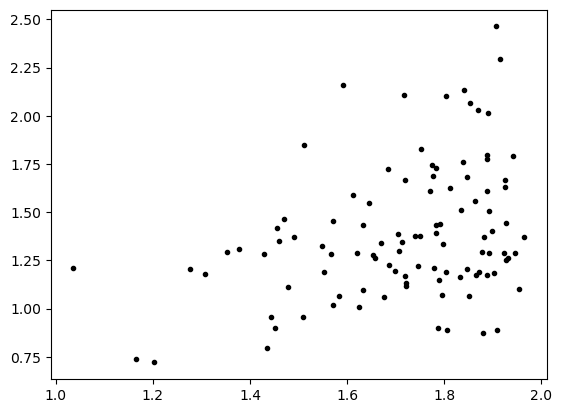

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word ndt_mean 0.34638080617527256


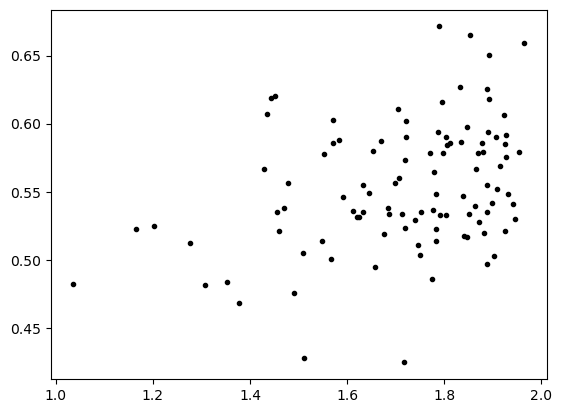

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean_word alpha_mean 0.43299131704867383


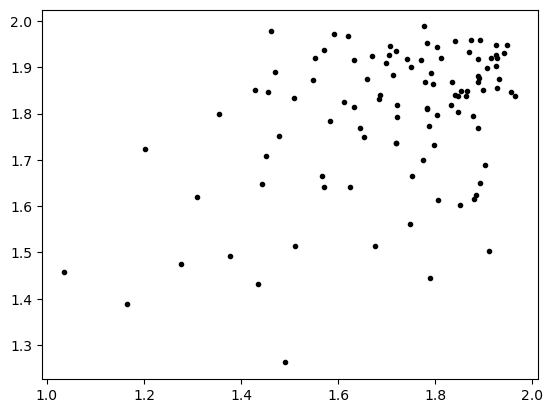

In [30]:
params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','a_mean','ndt_mean','alpha_mean']
for param_task_1 in params_mean :
    first_task=df_word_part_1[param_task_1]
    
    for param_task_2 in params_mean : 
        second_task = pictures_part_1 [param_task_2]
        data = {'subje_num':df_word_part_1['subje_num'],param_task_1+str('_word'):np.array(first_task),param_task_2:np.array(second_task)}
        corr_data = pd.DataFrame(data)
        df_x = corr_data[[param_task_1+str('_word'), param_task_2]]
        df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task_1+str('_word'), param_task_2]])
        df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
        df_outliers=df_x.loc[df_x.p_value < 0.001]
        ind=df_outliers.index
    #drop the outliers with index     
        corr_without_outlier = corr_data.drop(ind)
        x = corr_without_outlier[param_task_1+str('_word')]
        y = corr_without_outlier[param_task_2]
        corr =  np.corrcoef(x, y)[0,1]
        print(param_task_1+str('_word'),param_task_2,corr)
        plt.plot(x, y, '.', color='black')
        plt.show()

        #final_corr_frame['corr_'+str(param)] = [corr]

        
        
            

/tmp/ipykernel_235201/2047868107.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean
Int64Index([], dtype='int64')
v1_mean 0.081 0.41735
v2_mean
Int64Index([14], dtype='int64')
v2_mean 0.284** 0.00383


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v_total = v2 - v1
Int64Index([14], dtype='int64')
v_total = v2 - v1 0.207* 0.03723
v_bias = v2 + v1
Int64Index([], dtype='int64')
v_bias = v2 + v1 0.221* 0.02481
a_mean
Int64Index([], dtype='int64')
a_mean 0.301** 0.00199
ndt_mean
Int64Index([], dtype='int64')
ndt_mean 0.425*** 1e-05


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean
Int64Index([], dtype='int64')
alpha_mean 0.433*** 0.0


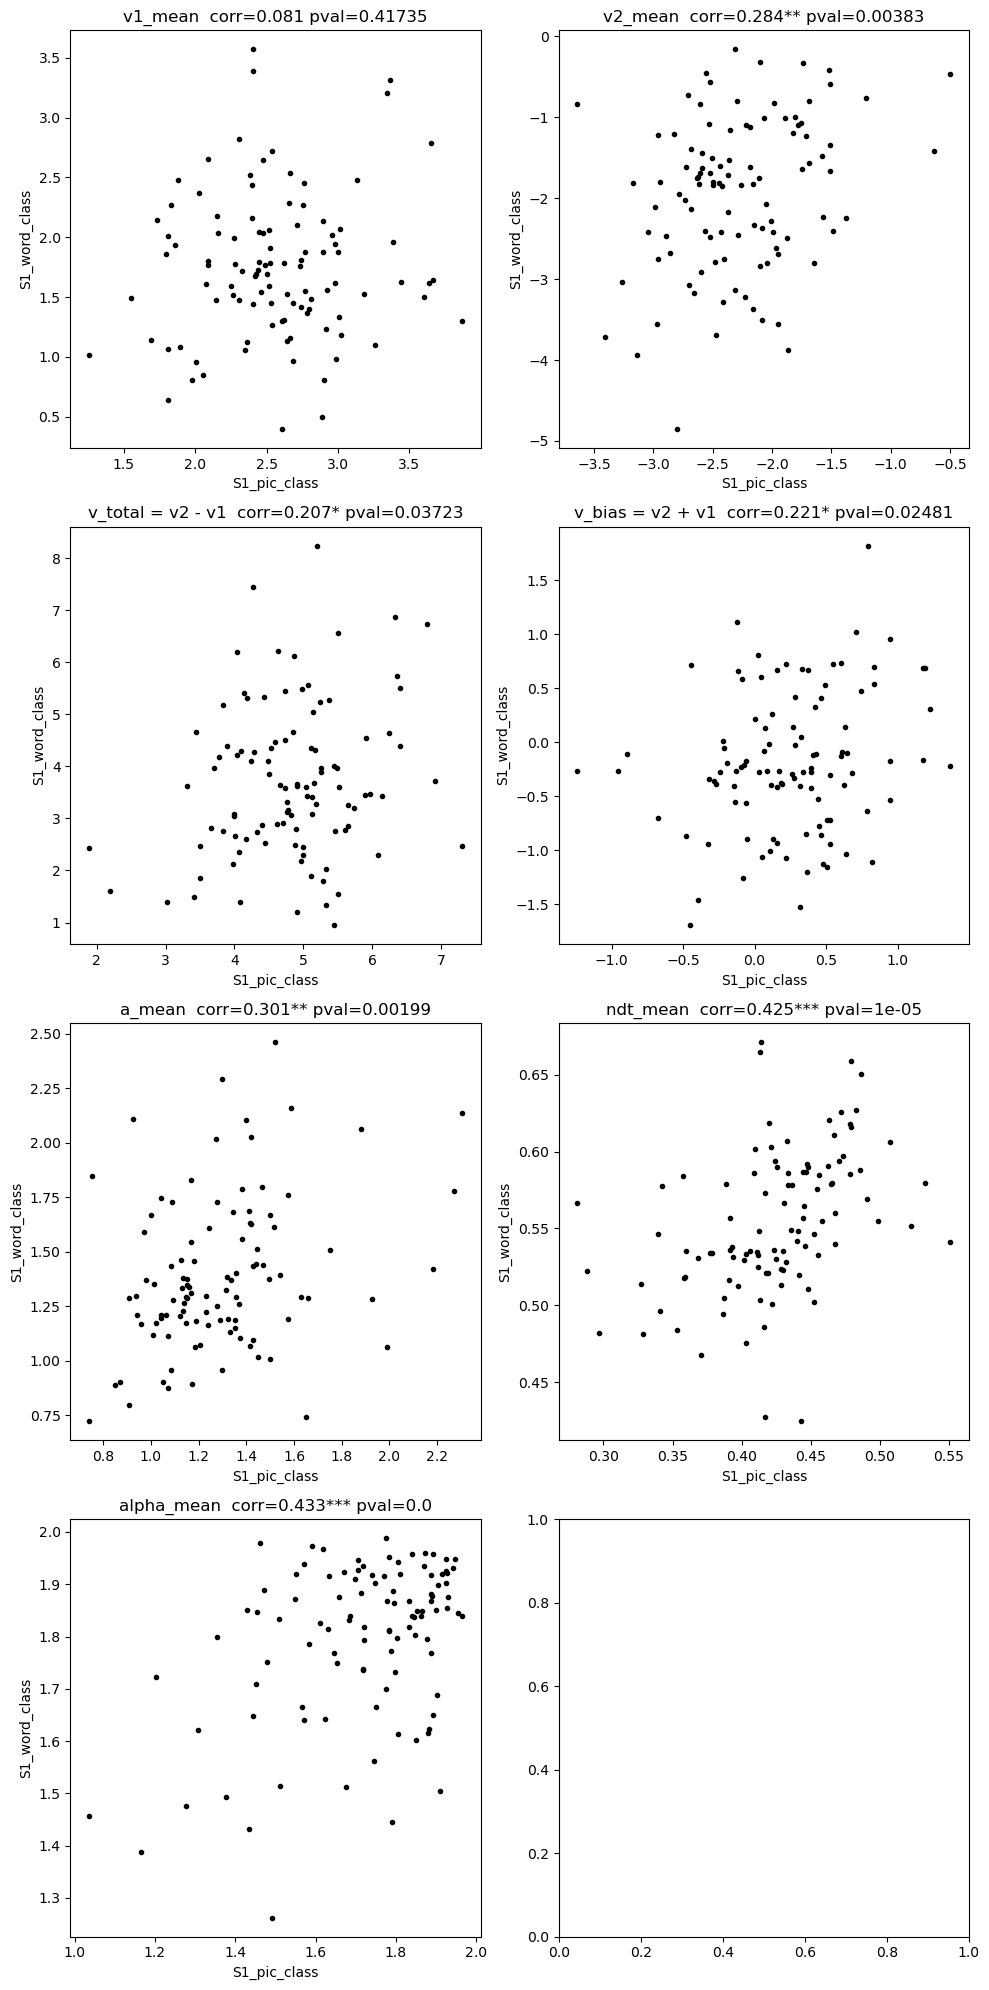

In [31]:
final_corr_frame = pd.DataFrame()
final_corr_frame['across_tasks']=['corr_word_pic_se_1']
from scipy.stats.stats import pearsonr

params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','a_mean','ndt_mean','alpha_mean']
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10, 20))
axs = axs.flatten()
a=0 
all_outlier_ind = []
for param_task in params_mean :
    first_task=df_word_part_1[param_task]
    
    second_task = pictures_part_1 [param_task]
    data = {'subje_num':df_word_part_1['subje_num'],param_task+str('_word'):np.array(first_task),param_task:np.array(second_task)}
    corr_data = pd.DataFrame(data)
    df_x = corr_data[[param_task+str('_word'), param_task]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task+str('_word'), param_task]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    all_outlier_ind.append(ind)
    print(param_task)
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_data.drop(ind)
    
    x = corr_without_outlier[param_task+str('_word')]
    y = corr_without_outlier[param_task]
    #corr =  np.corrcoef(x, y)[0,1]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param_task,corr,pvalue)
    #plt.plot(x, y, '.', color='black')
    #plt.show()
    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param_task+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_pic_class')
    axs[a].set_ylabel('S1_word_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param_task)] = ['cor='+str(corr)]

#saving the results 
fig.savefig("./EZ_retest_word_acrossTask_word_pic_S1_corr_.png", dpi=600, bbox_inches='tight')

    #final_corr_frame[param_task] = [corr]


        
            

In [30]:
final_corr_frame
final_corr_frame.to_excel("EZ_across_s1_w_p.xlsx")

,across_tasks,corr_v1_mean,corr_v2_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1,corr_a_mean,corr_ndt_mean,corr_alpha_mean
0,corr_word_pic_se_1,cor=0.104,cor=0.284**,cor=0.207*,cor=0.221*,cor=0.301**,cor=0.535***,cor=0.39***


# sessin 2 

In [31]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_2.')]
pictures_part_1 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
pictures_part_1

import re

# Given String
s = "001_class_pictures_part_2.dat"

# Performing Split
res_1 = re.split('_', s)
res_2 = re.split('a', s, 1)

# Print Results
print(res_1)
print(res_2)


#pictures_part_1['subje_num']= 'NaN'
pictures_part_1.insert(0, "subje_num", 'NaN', True)
df_word_part_1.insert(0, "subje_num", 'NaN', True)


for ind in pictures_part_1.index :
    name =pictures_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    pictures_part_1['subje_num'][ind]= subj_num
    
for ind in df_word_part_1.index :
    name =df_word_part_1['Experiment'][ind]
    subj_num = re.split('_', name)[0]
    df_word_part_1['subje_num'][ind]= subj_num
    
    
pictures_part_1=pictures_part_1.sort_values('subje_num')
pictures_part_1['subje_num']

df_word_part_1=df_word_part_1.sort_values('subje_num')
df_word_part_1=df_word_part_1[df_word_part_1['subje_num'].isin(pictures_part_1['subje_num'])]
    


['001', 'class', 'pictures', 'part', '2.dat']
['001_cl', 'ss_pictures_part_2.dat']


/tmp/ipykernel_261504/1753834372.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num
/tmp/ipykernel_261504/1753834372.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num
/tmp/ipykernel_261504/1753834372.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pictures_part_1['subje_num'][ind]= subj_num
/tmp/ipykernel_261504/1753834372.py:28: SettingWi

/tmp/ipykernel_235201/3725758246.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
v1_mean 0.081 0.41735
v1_mean 0.081 0.41735
Int64Index([14], dtype='int64')
v2_mean 0.284 0.00383
v2_mean 0.284** 0.00383
Int64Index([14], dtype='int64')
v_total = v2 - v1 0.207 0.03723
v_total = v2 - v1 0.207* 0.03723


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

Int64Index([], dtype='int64')
v_bias = v2 + v1 0.221 0.02481
v_bias = v2 + v1 0.221* 0.02481
Int64Index([], dtype='int64')
a_mean 0.301 0.00199
a_mean 0.301** 0.00199
Int64Index([], dtype='int64')
ndt_mean 0.425 1e-05
ndt_mean 0.425*** 1e-05
Int64Index([], dtype='int64')
alpha_mean 0.433 0.0
alpha_mean 0.433*** 0.0


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


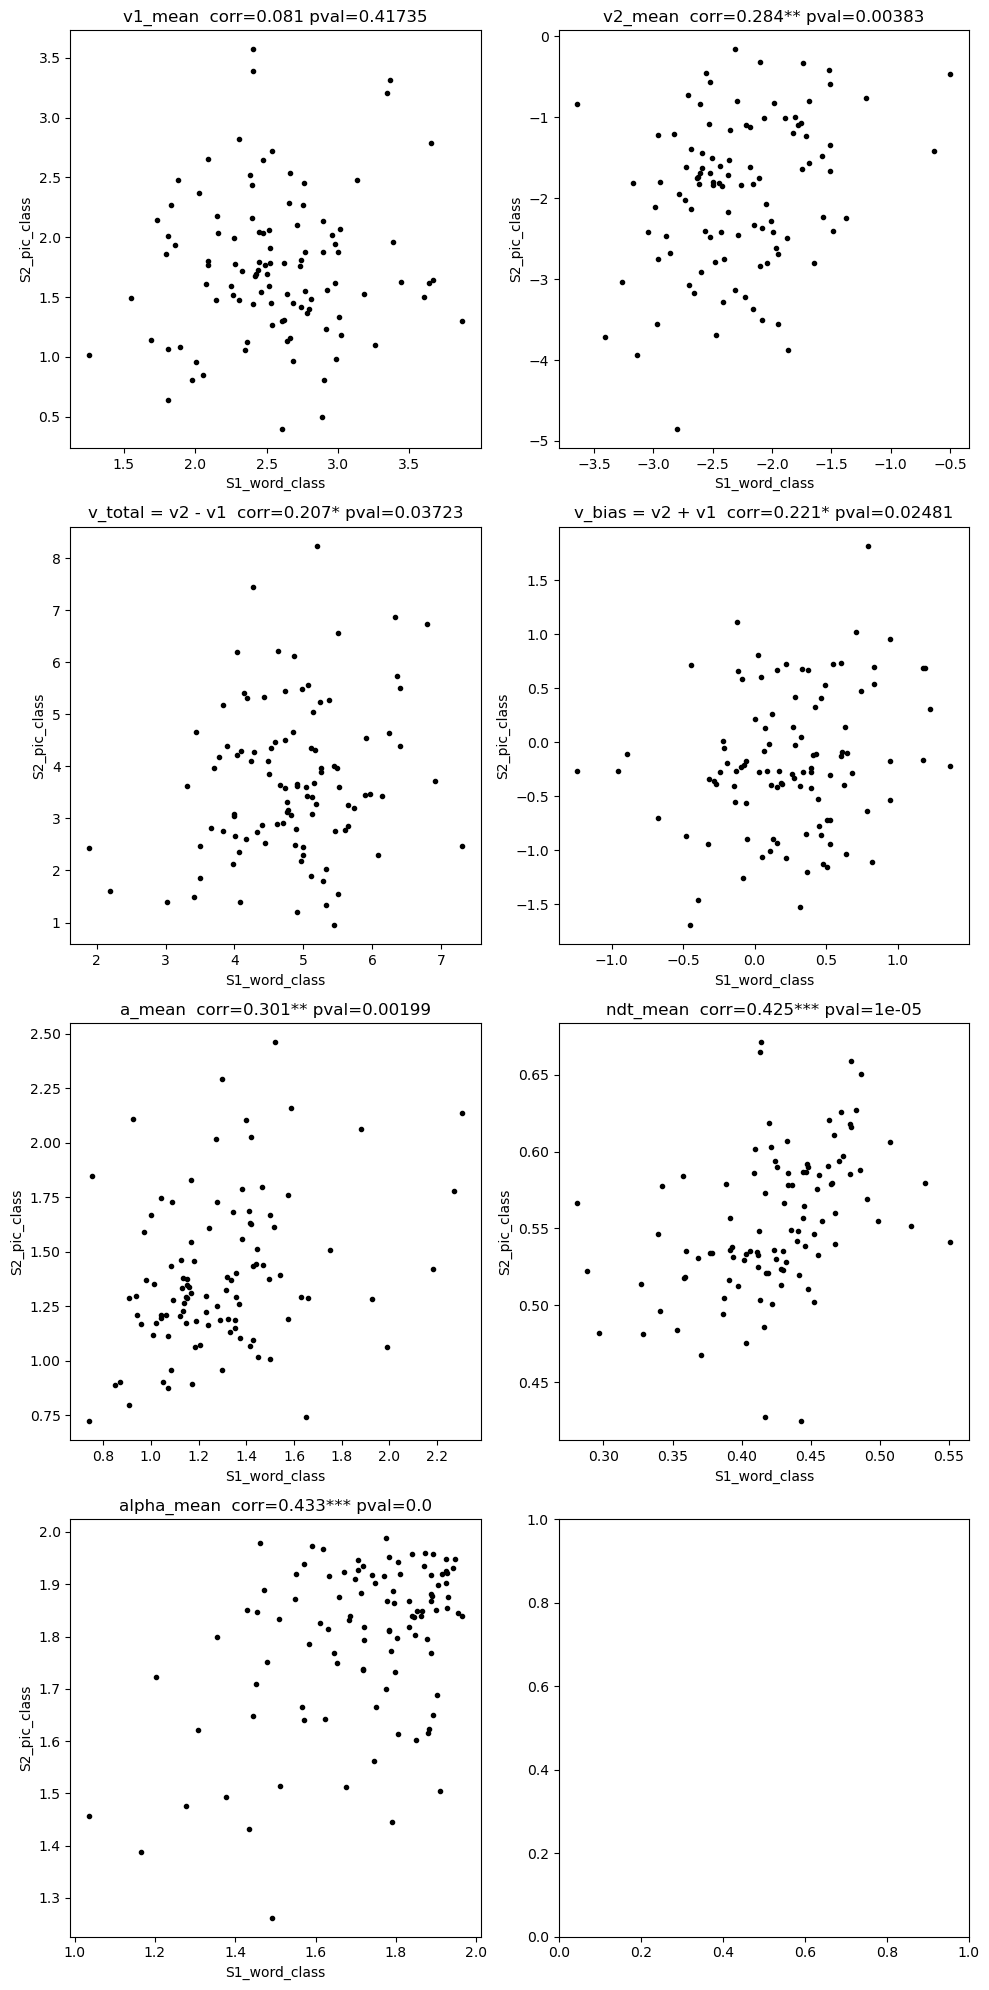

In [32]:
final_corr_frame_ses_2 = pd.DataFrame()
final_corr_frame_ses_2['across_tasks']=['corr_word_pic_se_2']
from scipy.stats.stats import pearsonr

params_mean=['v1_mean','v2_mean','v_total = v2 - v1','v_bias = v2 + v1','a_mean','ndt_mean','alpha_mean']

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10, 20))
axs = axs.flatten()
a=0

for param_task in params_mean :
    first_task=df_word_part_1[param_task]
    
    second_task = pictures_part_1 [param_task]
    data = {'subje_num':df_word_part_1['subje_num'],param_task+str('_word'):np.array(first_task),param_task:np.array(second_task)}
    corr_data = pd.DataFrame(data)
    df_x = corr_data[[param_task+str('_word'), param_task]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[[param_task+str('_word'), param_task]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_data.drop(ind)
    x = corr_without_outlier[param_task+str('_word')]
    y = corr_without_outlier[param_task]
    #corr =  np.corrcoef(x, y)[0,1]
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    print(param_task,corr,pvalue)
    
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param_task,corr,pvalue)
    #plt.plot(x, y, '.', color='black')
    #plt.show()
    axs[a].plot(x, y,'.',color='black')
    axs[a].set_title(param_task+'  corr='+str(corr)+' pval='+str(pvalue))
    axs[a].set_xlabel('S1_word_class')
    axs[a].set_ylabel('S2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame_ses_2['corr_'+str(param_task)] = ['cor='+str(corr)]

#saving the results 
#fig.savefig("./EZ_retest_acrossTask_word_pic_s2_corr_.png", dpi=600, bbox_inches='tight')

    #plt.plot(x, y, '.', color='black')
    #plt.show()

    #final_corr_frame_ses_2[param_task] = [corr]


        
            

In [34]:
final_corr_frame_ses_2
final_corr_frame_ses_2.to_excel("EZ_across_s2_w_p.xlsx")

In [157]:
corr_frame = pd.DataFrame()
data = {'Experiment':df_word_part_1['Experiment'],'v1_mean_part_1':np.array(df_word_part_1['v1_mean']),'v1_mean_part_2':np.array(df_word_part_2['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
corr_data = pd.DataFrame(data)

In [158]:
corr_data

,Experiment,v1_mean_part_1,v1_mean_part_2
368,001_class_words_part_1.dat,1.932449,1.836586
108,002_class_words_part_1.dat,2.702269,3.120898
347,003_class_words_part_1.dat,3.536402,3.032153
97,004_class_words_part_1.dat,2.840207,2.106693
62,005_class_words_part_1.dat,3.629910,4.021148
...,...,...,...
393,4009_class_words_part_1.dat,1.950321,2.035931
242,4010_class_words_part_1.dat,2.728556,2.771703
176,4011_class_words_part_1.dat,2.009517,1.966102
341,4012_class_words_part_1.dat,2.799609,2.749953


In [11]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [159]:


df_x = corr_data[['v1_mean_part_1', 'v1_mean_part_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_part_1', 'v1_mean_part_2']])
df_x

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,v1_mean_part_1,v1_mean_part_2,mahala
368,1.932449,1.836586,2.875042
108,2.702269,3.120898,0.720728
347,3.536402,3.032153,3.453610
97,2.840207,2.106693,4.059589
62,3.629910,4.021148,3.070563
...,...,...,...
393,1.950321,2.035931,2.436722
242,2.728556,2.771703,0.032060
176,2.009517,1.966102,2.299828
341,2.799609,2.749953,0.102952


In [13]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

13.815510557964274

In [161]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [162]:
df_without_outlier

,v1_mean_part_1,v1_mean_part_2,mahala,p_value


In [163]:
x = df_x['v1_mean_part_1']
y = df_x['v1_mean_part_2']

corr = np.corrcoef(x, y)
corr

array([[1.        , 0.78609582],
       [0.78609582, 1.        ]])

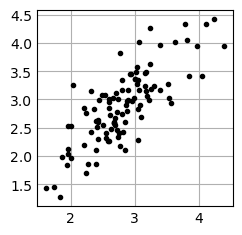

In [164]:
#plt.style.use('_mpl-gallery')

np.random.seed(3)
plt.plot(x, y, '.', color='black');

In [165]:
for column in df_word_part_1:
    print (column)

Experiment
v1_mean
v2_mean
v_total = v2 - v1
v_bias = v2 + v1
zr_mean
a_mean
ndt_mean
sndt_mean
alpha_mean
v1_median
v2_median
zr_median
a_median
ndt_median
sndt_median
alpha_median


v1_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


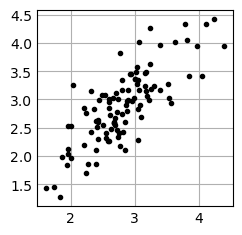

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean


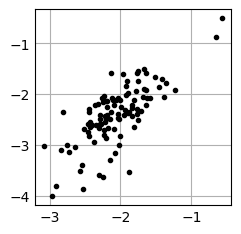

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean


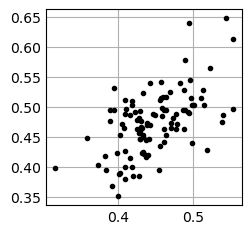

a_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


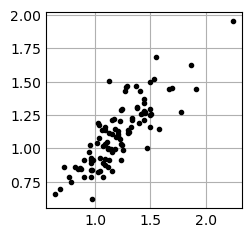

ndt_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


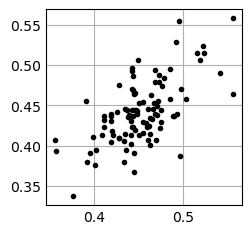

sndt_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


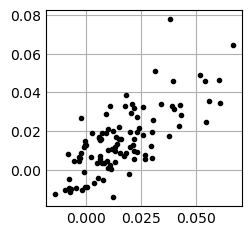

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean


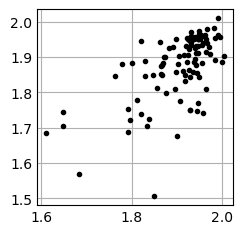

v_total = v2 - v1


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


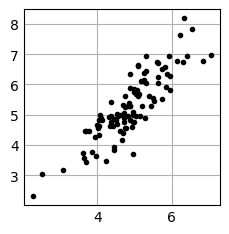

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1


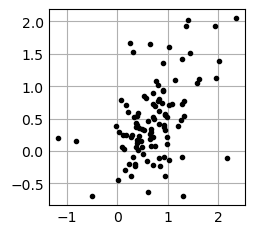

In [173]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_word_class.csv',index=False)
 
    


In [168]:
type(corr)

numpy.float64

In [170]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_words,between session,0.786096,0.73337,0.568431,0.825054,0.62521,0.732236,0.61177,0.863206,0.456259


In [182]:
df = pd.read_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv')

In [183]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,2.775302,-1.843634,4.618935,0.931668,0.488304,1.286637,0.491423,0.020234,1.939520,2.773315,-1.846082,0.488600,1.281603,0.491504,0.019269,1.949172
1,1025_class_words_part_2.dat,3.951487,-3.030869,6.982357,0.920618,0.460097,1.024971,0.444822,-0.005482,1.973413,3.954950,-3.037287,0.458662,1.018384,0.445139,-0.005015,1.982923
2,1011_class_pictures_part_1.dat,1.094287,-2.053254,3.147541,-0.958966,0.453859,0.842740,0.664780,0.071449,1.680715,1.091987,-2.045152,0.454633,0.854842,0.665247,0.072577,1.714519
3,017_class_pictures_part_1.dat,1.991843,-3.771075,5.762918,-1.779232,0.528398,1.331145,0.578720,0.009057,1.953899,1.983995,-3.763898,0.527143,1.319353,0.579576,0.009263,1.964867
4,1004_class_pictures_part_1.dat,1.695352,-1.766107,3.461459,-0.070756,0.480083,1.414699,0.578250,0.005018,1.988156,1.686150,-1.760669,0.480401,1.408314,0.578744,0.006036,1.997333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.135326,-2.062411,4.197737,0.072915,0.469826,1.455127,0.596721,-0.002554,1.931114,2.137020,-2.062913,0.469075,1.444680,0.597516,-0.002212,1.940250
410,1023_class_pictures_part_1.dat,3.307016,-3.484820,6.791837,-0.177804,0.474430,1.509676,0.579413,0.004299,1.862007,3.292227,-3.468304,0.473009,1.448166,0.583168,0.004180,1.879247
411,4012_class_pictures_part_1.dat,2.051275,-1.920975,3.972249,0.130300,0.456702,1.345215,0.487066,-0.000880,1.877587,2.047991,-1.912331,0.456495,1.335037,0.487524,0.000836,1.889739
412,4012_class_pictures_part_2.dat,1.925139,-3.061887,4.987026,-1.136749,0.538818,1.016065,0.486288,0.024233,1.820477,1.916742,-3.052243,0.538277,1.013394,0.486856,0.023971,1.850107


# class_pictures

In [7]:
#consider one task in two session 
df_class_pictures_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_class_pictures_2 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
6,1011_class_pictures_part_2.dat,1.521192,-1.381937,2.903128,0.139255,0.431612,0.813536,0.567737,0.015838,1.852055,1.507616,-1.366583,0.430473,0.820090,0.567440,0.014719,1.886254
7,2001_class_pictures_part_2.dat,2.537672,-3.069423,5.607095,-0.531751,0.423771,1.686591,0.496619,-0.019674,1.971699,2.530272,-3.058482,0.422569,1.668224,0.498256,-0.018804,1.985204
8,1021_class_pictures_part_2.dat,3.893263,-4.381039,8.274302,-0.487776,0.551409,1.512247,0.524401,-0.001437,1.959123,3.892303,-4.421184,0.553390,1.477201,0.526697,-0.001397,1.972604
13,4004_class_pictures_part_2.dat,2.831184,-2.345578,5.176762,0.485605,0.365945,0.852385,0.555158,0.040578,1.889070,2.823187,-2.327886,0.361180,0.849662,0.554321,0.041232,1.922671
19,1020_class_pictures_part_2.dat,3.041624,-2.627500,5.669124,0.414124,0.410516,1.434432,0.539972,-0.010225,1.994102,3.049235,-2.641087,0.409136,1.421854,0.540657,-0.009599,2.003778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,3003_class_pictures_part_2.dat,2.878718,-2.400901,5.279619,0.477817,0.392220,1.275650,0.484662,0.000293,1.967320,2.880454,-2.411948,0.389823,1.263853,0.484820,0.001645,1.978158
402,011_class_pictures_part_2.dat,3.314563,-3.512272,6.826834,-0.197709,0.487942,1.101947,0.513341,0.002766,1.982045,3.306083,-3.490823,0.487174,1.092838,0.513854,0.003441,1.992730
407,3017_class_pictures_part_2.dat,3.650386,-1.697564,5.347950,1.952822,0.397638,0.934083,0.648869,0.023299,1.977516,3.638426,-1.672621,0.396549,0.934243,0.647847,0.022686,1.992248
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


In [23]:
df_class_pictures_1=df_class_pictures_1.sort_values('Experiment')
df_class_pictures_2=df_class_pictures_2.sort_values('Experiment')

In [24]:
data_analysis = {'Experiment':df_class_pictures_1['Experiment'],'par_1':np.array(df_class_pictures_1['v1_mean']),'par_2':np.array(df_class_pictures_2['v1_mean'])}
data_analysis
corr_frame = pd.DataFrame(data_analysis)
corr_frame

,Experiment,par_1,par_2
171,001_class_pictures_part_1.dat,2.631589,3.142965
400,002_class_pictures_part_1.dat,2.775742,2.550106
355,003_class_pictures_part_1.dat,2.184253,2.836046
86,004_class_pictures_part_1.dat,2.350880,2.263182
401,005_class_pictures_part_1.dat,2.090355,2.295909
...,...,...,...
266,4009_class_pictures_part_1.dat,2.489222,2.151345
269,4010_class_pictures_part_1.dat,2.902879,4.171052
83,4011_class_pictures_part_1.dat,1.080112,1.266913
411,4012_class_pictures_part_1.dat,2.257025,2.048675


In [25]:
df_x = corr_frame[['par_1', 'par_2']]


In [26]:
df_x = corr_frame[['par_1', 'par_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[['par_1', 'par_2']])
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_outliers=df_x.loc[df_x.p_value < 0.001]
ind=df_outliers.index
print(ind)

Int64Index([258], dtype='int64')


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.6661348356836365
v_bias = v2 + v1


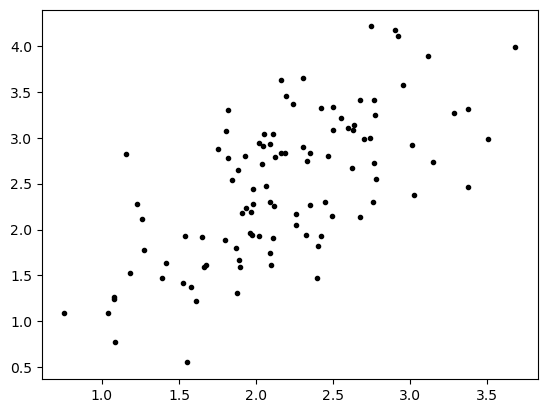

In [27]:
corr_without_outlier = corr_frame.drop(ind)
x = corr_without_outlier['par_1']
y = corr_without_outlier['par_2']
corr =  np.corrcoef(x, y)[0,1]
print(corr)
print(param)
plt.plot(x, y, '.', color='black')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([258], dtype='int64')
v1_mean


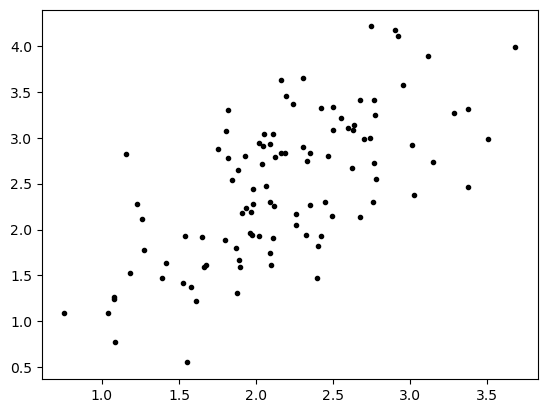

Int64Index([359], dtype='int64')
v2_mean


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


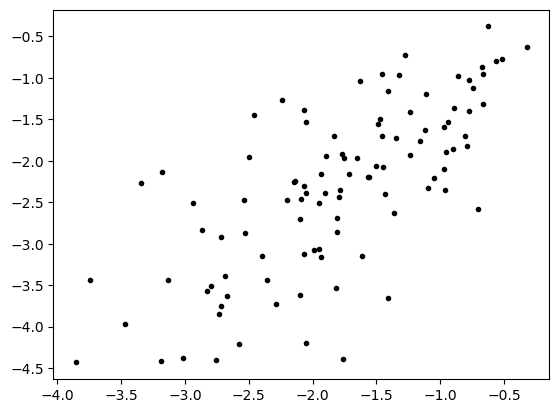

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([223], dtype='int64')
zr_mean


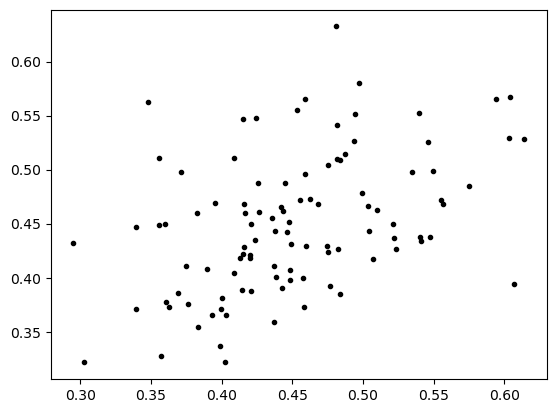

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
a_mean


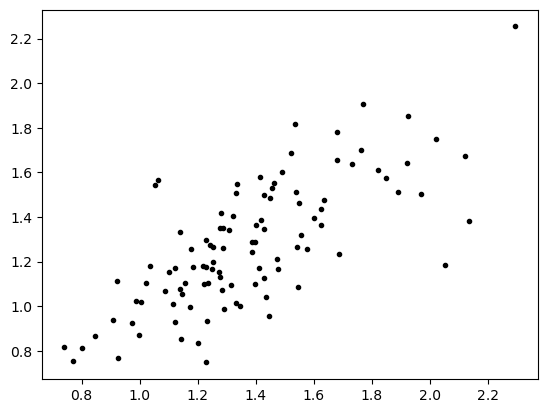

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([409], dtype='int64')
ndt_mean


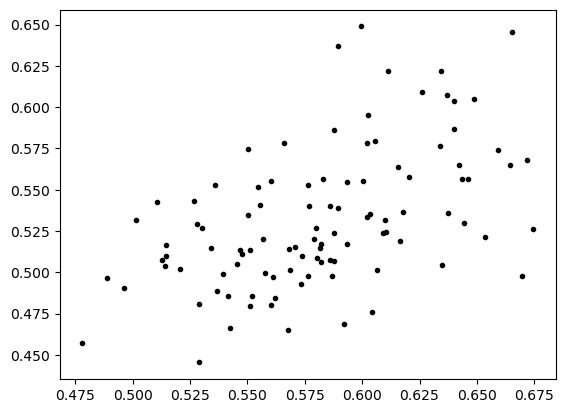

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([152, 223], dtype='int64')
sndt_mean


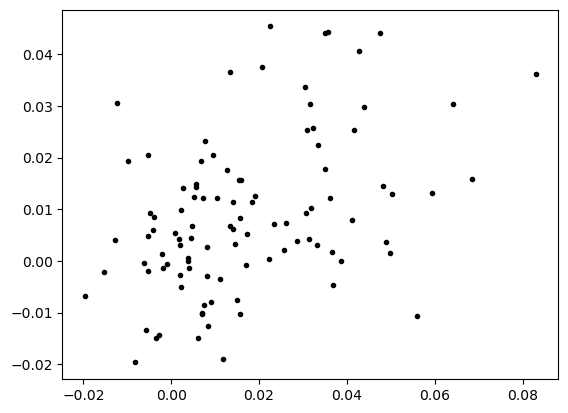

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([2, 409, 327], dtype='int64')
alpha_mean


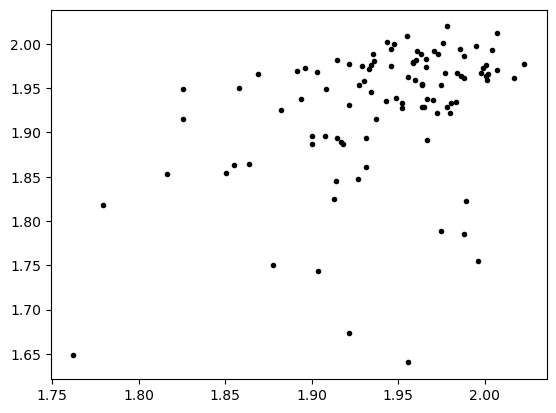

Int64Index([], dtype='int64')
v_total = v2 - v1


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


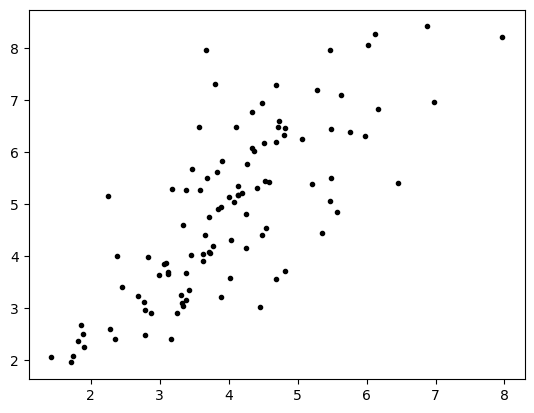

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
v_bias = v2 + v1


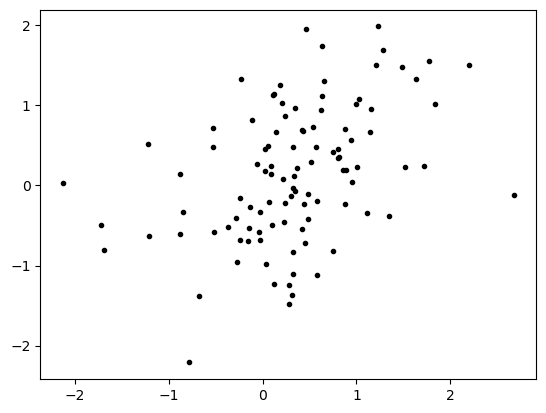

In [29]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_class_pictures.csv',index=False)
 
    


In [30]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_pictures,between session,0.666135,0.712565,0.43526,0.731934,0.514505,0.420097,0.403703,0.768859,0.422742
